<a href="https://colab.research.google.com/github/martinpius/PG_training/blob/main/pg_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
from google.colab import drive

In [19]:
drive.mount("/content/drive/", force_remount = True)

Mounted at /content/drive/


In [3]:
url = "https://raw.githubusercontent.com/martinpius/PG_training/refs/heads/main/boston_housing.csv"

In [4]:
boston_df = pd.read_csv(url)

In [5]:
display(boston_df.head(10))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


columns: #cols: List = [col for col in columns if col not in ['INDUS','PTRATIO', 'NOX', "RM", "TAX"]]
# Variables descriptions:
# columns = [
# "CRIM",        # Per capita crime rate by town
# "ZN",          # Proportion of residential land zoned for lots over 25,000 sq. ft.
# "INDUS",       # Proportion of non-retail business acres per town
# "CHAS",        # Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# "NOX",         # Nitric oxide concentration (parts per 10 million)
# "RM",          # Average number of rooms per dwelling
# "AGE",         # Proportion of owner-occupied units built before 1940
# "DIS",         # Weighted distances to five Boston employment centers
# "RAD",         # Index of accessibility to radial highways
# "TAX",         # Full-value property tax rate per $10,000
# "PTRATIO",     # Pupil-teacher ratio by town
# "B",           # 1000(Bk - 0.63)^2 where Bk is the proportion of Black individuals by town
# "LSTAT"        # Percentage of lower status population

In [6]:
print(boston_df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [7]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
boston_df.iloc[:5, [0,1,3]]

,CRIM,ZN,CHAS
0,0.00632,18.0,0.0
1,0.02731,0.0,0.0
2,0.02729,0.0,0.0
3,0.03237,0.0,0.0
4,0.06905,0.0,0.0


In [10]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
boston_df.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [13]:
boston_df.shape

(506, 14)

Text(0.5, 1.02, 'Correlation heatmap')

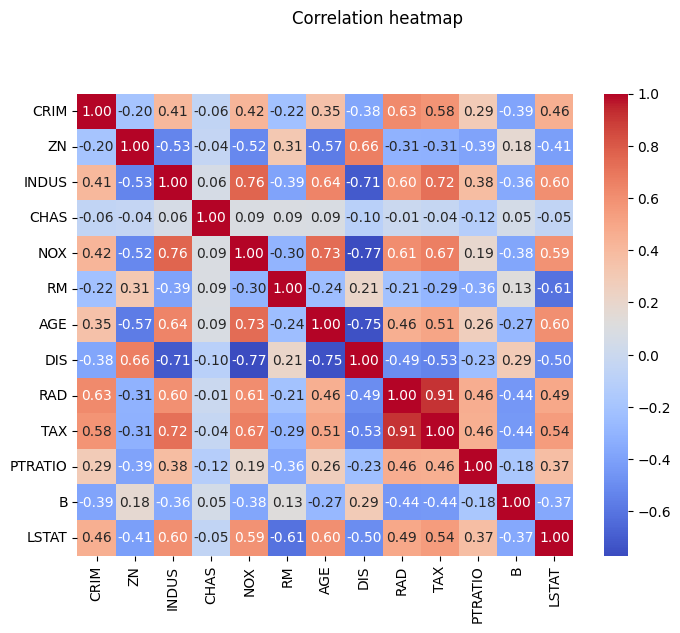

In [21]:
plt.figure(figsize = (8, 6))
sns.heatmap(data = boston_df.iloc[:,:-1].corr(), cmap= "coolwarm",
            fmt = ".2f", annot = True)
plt.suptitle("Correlation heatmap", y = 1.02 )

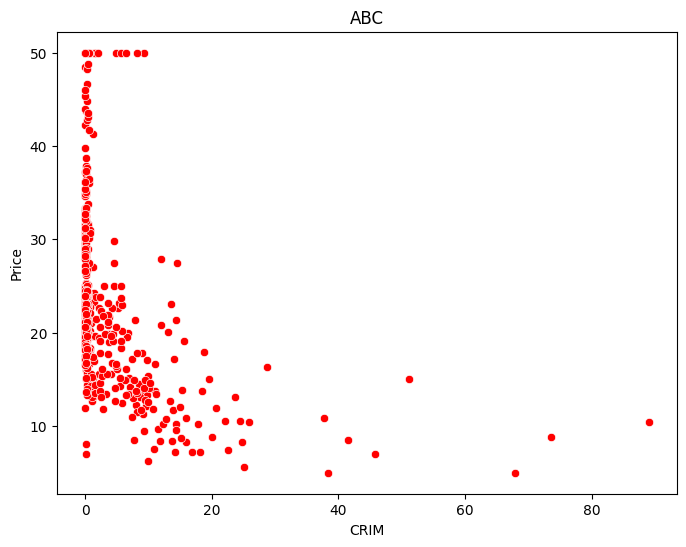

In [24]:
plt.figure(figsize = (8, 6))
sns.scatterplot(data = boston_df, x = "CRIM", y = "MEDV", color = "red")
plt.title("ABC")
plt.xlabel("CRIM")
plt.ylabel("Price")
plt.show()


In [33]:
columns = list(boston_df.columns)

In [34]:
columns

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [27]:
indcols = columns[:-1]

In [28]:
indcols

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [29]:
X = boston_df[indcols]

In [30]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [35]:
y = boston_df["MEDV"]

In [ ]:
X, y = X.values, y.values

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 231, test_size = 0.3)

In [38]:
Xtrain.shape

(354, 13)

In [39]:
Xtest.shape

(152, 13)

In [40]:
from sklearn.linear_model import LinearRegression

In [42]:
reg_model = LinearRegression()

In [43]:
reg_fit = reg_model.fit(X = Xtrain, y = ytrain)

In [44]:
preds = reg_fit.predict(Xtest)

In [45]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

In [46]:
Rsquare = r2_score(ytest, preds)

In [47]:
Rsquare

0.7182948578631814

In [48]:
reg_fit.coef_

array([-1.30528035e-01,  4.20375791e-02,  5.31721294e-02,  1.93496035e+00,
       -1.52588101e+01,  3.89628068e+00,  2.93054114e-03, -1.33052203e+00,
        2.79290010e-01, -1.22275357e-02, -9.78726624e-01,  8.45512750e-03,
       -5.63880415e-01])

In [49]:
mse = mean_squared_error(ytest, preds)

In [50]:
mse

21.110958843971083

In [51]:
rmse = root_mean_squared_error(ytest, preds)

In [52]:
rmse

4.5946663474044644